# Data Analysis - Financial Time Series

**Author**: [Gabriele Pompa](https://www.linkedin.com/in/gabrielepompa/): gabriele.pompa@unisi.com

# Table of contents

[Executive Summary](#summary)

**TODO**

### **Resources**: 

**TODO**

# Executive Summary <a name="summary"></a>

**TODO**

These are the basic imports that we need to work with NumPy, Pandas and to plot data using Matplotlib functionalities

In [1]:
# for NumPy arrays
import numpy as np

# for Pandas Series and DataFrame
import pandas as pd

# for Matplotlib plotting
import matplotlib.pyplot as plt

# to do inline plots in the Notebook
%matplotlib inline

# for Operating System operations
import os

# 1. Introduction <a name="introduction"></a>

When you need to process data using a programming languages, either you have your data stored in a file or database (as we have seen in the previous lesson) or you get your data from a Data Provider, such as Bloomberg, Reuters, etc.

Typically, data providers store secured their data in remote servers and expose interfaces to the public: these are called [Application Programming Interfaces](https://en.wikipedia.org/wiki/Application_programming_interface) (APIs). For what concern us, an API is a particular piece of code that allows you to get data from a data provider.

There are plenty of APIs which manage the interface between Python code and financial data, like [Reuters Eikon Data API](https://developers.refinitiv.com/eikon-apis/eikon-data-api). Being a business in itself, most of APIs to retrieve financial data are not for free.

Luckily for us, and thanks to people like [Ran Aroussi](https://aroussi.com/), we have a Python API, called [yfinance](https://github.com/ranaroussi/yfinance), which is 100% free:

- yfinance Github page: [https://github.com/ranaroussi/yfinance](https://github.com/ranaroussi/yfinance);
- Blog post form Ran Aroussi with a yfinance tutorial: [https://aroussi.com/post/python-yahoo-finance](https://aroussi.com/post/python-yahoo-finance).

In a nutshell, yfinance - named after the now decommissioned _Yahoo! Finance_ API, is a reliable Python API to retrieve market data.

The yfinance API comes under the form of a Python module: `yfinance`. We shall see now how to include it in our Conda installation. 

## 1.1. Installing `yfinance` <a name="installing-yfinance"></a>

All you need to do to install yfinance library is to:

- (If not done already) In your Anaconda Navigator switch to the class `ITForBusAndFin2020_env` conda environment (see [Figure 1](#anaconda_nav_and_env)). For Mac users: in case you are working under `base (root)` environment, it's ok, you can stay there.

| ![](../images/anaconda_nav_and_env.PNG) <a name="anaconda_nav_and_env"></a>| 
|:--:| 
| _**Figure 1**: in Anaconda Navigator, switch to the class conda environment_ |

- (iIf not done already) Open your terminal window (the usual black command line window) using the _CMD.exe Prompt_ app or the _console_shortcut_ app in the Anaconda Navigator (both apps are fine and you have displayed one or the other depending on whether you have already updated the Anaconda Navigator or not yet, see [Figure 2](#open_terminal)).

| ![](../images/CMD_exe.PNG) | 
|:--:| 
| ![](../images/console_shortcut.PNG) | 
| _**Figure 2**: Open a Terminal window using the  CMD.exe Prompt app or console_shorcut app in Anaconda Navigator_ <a name="open_terminal"></a>|

- (If not done already) In the terminal window, change directory to your local class folder typing `cd` followed by the complete path to the class folder, like `C:\Users\gabri\Projects\IT_For_Business_And_Finance_2019_20` on my local machine (see [Figure 3](#yfinance_png) below) 


- In the terminal window type the command to install `yfinance` (see [Figure 3](#yfinance_png)):
  ```
  pip install yfinance --upgrade --no-cache-dir
  ```
  
| ![](../images/yfinance.png) <a name="yfinance_png"></a>| 
|:--:| 
| _**Figure 3**: change directory to the class folder and install `yfinance` package in conda_ |



- Always type `y` when asked for installation confirmation;


- You can check that `yfinance` is now part of the packages available in your conda environment typing
  ```
  conda list 
  ```
  which lists all the packages installed (see resulting screen from `conda list` command in [Figure 4](#conda_list_yfinance))

| ![](../images/conda_list_yfinance.png) <a name="conda_list_yfinance"></a>| 
|:--:| 
| _**Figure 4**: check that `yfinance` is installed, typing `conda list`_ |


## 1.2. `yfinance` basic usage <a name="yfinance-basic-usage"></a>

To use yfinance library, we just import the corresponding `yfinance` Python module, giving it the `yf` alias.

In [2]:
import yfinance as yf

For details on `yfinance` usage, see the [dedicated blog post](https://aroussi.com/post/python-yahoo-finance) from Ran Aroussi. Broadly speaking, `yfinance` allows you to:

- get market and meta data for one (or more than one) security, using the `yf.Ticker()` module;
- doing mass download of market data, using the `yf.download()` function.

Let's reuse the utility function to delete files

In [3]:
def removeFile(fileName):
    """
    removeFile(fileName) function remove file 'fileName', if it exists. It also prints on screen a success/failure message.
    
    Parameters:
        fileName (str): name of the file ('Data' folder is assumed)
        
    Returns:
        None
    """

    if os.path.isfile(os.path.join(dataFolderPath, fileName)):
        os.remove(os.path.join(dataFolderPath, fileName))

        # double-check if file still exists
        fileStillExists = os.path.isfile(os.path.join(dataFolderPath, fileName))

        if fileStillExists:
            print("Failure: file {} still exists...".format(fileName))
        else:
            print("Success: file {} successfully removed!".format(fileName))
            
    else:
        print("File {} already removed.".format(fileName))

In [4]:
downloadData = False #True

### 1.2.1. How to lookup for a Yahoo! Finance ticker of a security <a name="how-to-lookup-for-a-ticker-of-a-security"></a>

If you want to get market data and information for a security, you need to use the `yf.Ticker()` module, which takes in input the appropriate security symbol:

```python
yf.Ticker(SymbolString)
```

where `SymbolString` is the Python String representing the symbol ticker of the desired security (like 'AAPL', 'MSFT', etc.).

Most symbols are well known from financial news (like 'AAPL' for Apple Inc. or 'MSFT' for Microsoft Corporation, etc.), but in case you know the public name of a company or security but don't remember the corresponding symbol, you can use the [Symbol Lookup from Yahoo Finance](https://finance.yahoo.com/lookup/). 

Suppose you want to look for the Fiat Chrysler Automobiles symbol. Start writing the public name of the company in the search bar and you get the back the information that the symbol is **'FCAU'**.

| ![](../images/yahoo_symbol_lookup.png) <a name="yahoo_symbol_lookup"></a>| 
|:--:| 
| _**Figure 5**: Symbol Lookup from Yahoo Finance_ |

Here is a list of tickers that we will use in this notebook

Yahoo! Finance ticker | Name
:---: | :---
    'AAPL' | Apple Inc. Stock
    'GOOG' | Alphabet Inc. Stock
    'FB'   | Facebook, Inc. Stock
    'MSFT' | Microsoft Corporation Stock
    'INTC' | Intel Corporation Stock
    'AMZN' | Amazon.com, Inc. Stock
    'BABA' | Alibaba Group Holding Limited Stock
    'NFLX' | Netflix, Inc. Stock
    'DIS'  | The Walt Disney Company Stock
    'GS'   | The Goldman Sachs Group, Inc. Stock
    'DB'   | Deutsche Bank Aktiengesellschaft Stock
    '^GSPC'| S&P 500 Index
    '^VIX' | CBOE Volatility Index
    'EURUSD=X' | EUR/USD Exchange Rate
    'EURCHF=X' | EUR/CHF Exchange Rate
    'EURGBP=X' | EUR/GBP Exchange Rate
    'FCAU' | Fiat Chrysler Automobiles N.V.
    'E' | Eni S.p.A. Stock
    'ENIA' | Enel Americas S.A. Stock

### 1.2.2. How to get market and meta data for a security: `yf.Ticker()` module <a name="get-market-and-meta-data:-yf.ticker()-module"></a>

In [5]:
aapl = yf.Ticker("AAPL")
aapl

yfinance.Ticker object <AAPL>

In [6]:
import json

In [7]:
dataFolderPath = "../Data"

In [8]:
filePath = os.path.join(dataFolderPath, "AAPL_Stock_Info.json")

In [9]:
if downloadData:
    %time aapl_info = aapl.info

else:
    with open(filePath, 'r') as file:
        %time aapl_info = json.load(file)

aapl_info

Wall time: 0 ns


{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 137000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides digital content stores and streaming services; AppleCare support services; and iCloud, a cloud service, which stores music, photos, contacts, calendars, mail, documents, and others. In addition, the company offers various service, such as Apple Arcade, a game subscription service; Apple Card, a co-branded credit card; Apple News+, a subscription news and magazine service; and Apple Pay, a cashless payment service, as well 

In [10]:
aapl_info['longBusinessSummary']

'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides digital content stores and streaming services; AppleCare support services; and iCloud, a cloud service, which stores music, photos, contacts, calendars, mail, documents, and others. In addition, the company offers various service, such as Apple Arcade, a game subscription service; Apple Card, a co-branded credit card; Apple News+, a subscription news and magazine service; and Apple Pay, a cashless payment service, as well as licenses its intellectual property, and provides other related services. The company serves c

In [11]:
aapl_info['regularMarketPreviousClose']

259.43

In [12]:
if downloadData:
    with open(filePath, 'w') as file:
        %time json.dump(aapl_info, file, indent="\t")

In [13]:
# removeFile(filePath)

In [14]:
aapl.actions

,Dividends,Stock Splits
Date,,
1987-05-11,0.00214,0.0
1987-06-16,0.00000,2.0
1987-08-10,0.00214,0.0
1987-11-17,0.00286,0.0
1988-02-12,0.00286,0.0
...,...,...
2019-02-08,0.73000,0.0
2019-05-10,0.77000,0.0
2019-08-09,0.77000,0.0


Text(0, 0.5, 'Dividends (USD)')

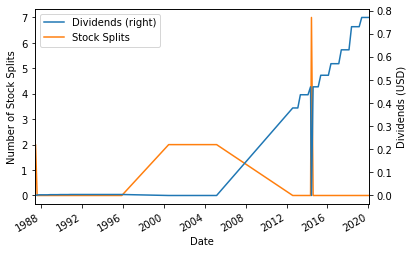

In [15]:
ax = aapl.actions.plot(secondary_y="Dividends")

ax.set_ylabel("Number of Stock Splits")
ax.right_ax.set_ylabel("Dividends (USD)")

````python
.history(start[, end, interval])
```

where:
    
- `start` parameter, is the `"YYYY-MM-DD"` Python String representing the first date for which we query data;
- `end` parameter, optional, is the `"YYYY-MM-DD"` Python String representing the last date for which we query data. By default is the last available date, which is usually either today or the last business day;
- `interval` parameter, optional, is the Python String representing the frequency of data retrieval. By default it is `"1d"`, that is daily frequency. Accepted values are:
    
`interval` parameter | data frequency
:---: | :---
`"1m"` | every 1 minute
`"2m"` | every 2 minutes
`"5m"` | every 5 minutes
`"15m"` | every 15 minutes
`"30m"` | every 30 minutes
`"60m"` | every 60 minutes
`"90m"` | every 90 minutes
`"1h"` | every 1 hour
`"1d"` | every 1 day
`"5d"` | every 5 days
`"1wk"` | every 1 week
`"1mo"` | every 1 month
`"3mo"` | every 3 months

alternatively

````python
.history(period[, interval])
```

where `period` parameter, optional, the length of the most recent period for which we query data. By default it is "ytd" (acronym for year to date), that is the period of time beginning the first day of the current year up to the current date. Accepted values are

`period` parameter | data period
:---: | :---
`"1d"` | last 1 day
`"5d"` | last 5 days
`"1mo"` | last 1 month
`"3mo"` | last 3 months
`"6mo"` | last 6 months
`"1y"` | last 1 year
`"2y"` | last 2 years
`"5y"` | last 5 years
`"10y"` | last 10 years
`"ytd"` | year to date
`"max"` | maximum available

In [16]:
aapl_history = aapl.history(period="max", interval="1wk")
aapl_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-08,0.41,0.41,0.41,0.41,117258400.0,0.0,0.0
1980-12-15,0.39,0.40,0.36,0.40,122533600.0,0.0,0.0
1980-12-22,0.42,0.50,0.42,0.50,46972800.0,0.0,0.0
1980-12-29,0.51,0.51,0.48,0.49,54863200.0,0.0,0.0
1981-01-05,0.48,0.48,0.43,0.45,49476000.0,0.0,0.0
...,...,...,...,...,...,...,...
2020-03-16,241.95,259.08,228.00,229.24,405065900.0,0.0,0.0
2020-03-23,228.08,258.68,212.61,247.74,346047500.0,0.0,0.0
2020-03-30,250.74,262.49,236.90,241.41,209252700.0,0.0,0.0


Text(0, 0.5, 'Close Price (USD)')

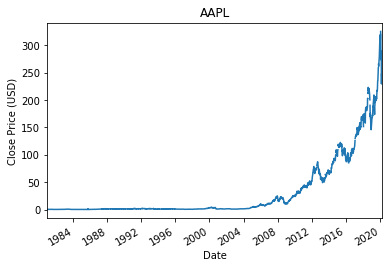

In [17]:
ax = aapl_history["Close"].plot()

ax.set_title("AAPL")
ax.set_ylabel("Close Price (USD)")

In [18]:
aapl_history_close_last_2y = aapl_history.loc["2018-04-08":, "Close"]
aapl_history_close_last_2y

Date
2018-04-09    169.89
2018-04-16    161.13
2018-04-23    157.82
2018-04-30    178.73
2018-05-07    183.36
               ...  
2020-03-16    229.24
2020-03-23    247.74
2020-03-30    241.41
2020-04-06    266.07
2020-04-09    265.27
Name: Close, Length: 114, dtype: float64

Text(0, 0.5, 'Close Price (USD)')

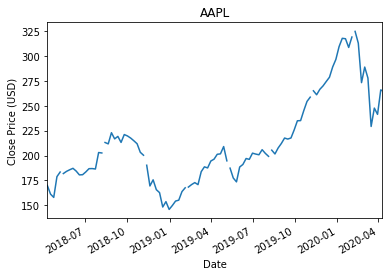

In [19]:
ax = aapl_history_close_last_2y.plot()

ax.set_title("AAPL")
ax.set_ylabel("Close Price (USD)")

Text(0, 0.5, 'Close Price (USD)')

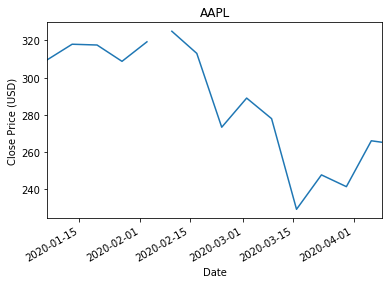

In [20]:
ax = aapl_history_close_last_2y["2020-01-01":].plot()

ax.set_title("AAPL")
ax.set_ylabel("Close Price (USD)")

#### 1.2.2.1. multiple securities simultaneously: `yf.Tickers()` module <a name="multiple-securities-simultaneously:-yf.tickers()-module"></a>

In [21]:
securities = yf.Tickers('FB AMZN NFLX GOOG')
securities

yfinance.Tickers object <FB,AMZN,NFLX,GOOG>

In [22]:
fb   = securities.tickers.FB
amzn = securities.tickers.AMZN
nflx = securities.tickers.NFLX
goog = securities.tickers.GOOG

In [23]:
filePath = os.path.join(dataFolderPath, "FANG_Stocks_Info.json")

In [24]:
if downloadData:
    %time info_dict = {'FB': fb.info, 'AMZN': amzn.info, 'NFLX': nflx.info, 'GOOG': goog.info}
    
else:
    with open(filePath, 'r') as file:
        %time info_dict = json.load(file)

info_dict

Wall time: 1.06 ms


{'FB': {'zip': '94025',
  'sector': 'Communication Services',
  'fullTimeEmployees': 44942,
  'longBusinessSummary': "Facebook, Inc. develops products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality headsets, and in-home devices worldwide. The company's products include Facebook that enables people to connect, share, discover, and communicate with each other on mobile devices and personal computers; Instagram, a community for sharing photos, videos, and private messages; Messenger, a messaging application for people to connect with friends, family, groups, and businesses across platforms and devices; and WhatsApp, a messaging application that is used by people and businesses to communicate in a private way. It also provides Oculus, a hardware, software, and developer ecosystem, which allows people to come together and connect with each other through its Oculus virtual reality products. Facebook, Inc. was founde

In [25]:
goog_info = info_dict['GOOG']
goog_info

{'zip': '94043',
 'sector': 'Communication Services',
 'fullTimeEmployees': 118899,
 'longBusinessSummary': 'Alphabet Inc. provides online advertising services in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It offers performance and brand advertising services. The company operates through Google and Other Bets segments. The Google segment offers products, such as Ads, Android, Chrome, Google Cloud, Google Maps, Google Play, Hardware, Search, and YouTube, as well as technical infrastructure. It also offers digital content, cloud services, hardware devices, and other miscellaneous products and services. The Other Bets segment includes businesses, including Access, Calico, CapitalG, GV, Verily, Waymo, and X, as well as Internet and television services. Alphabet Inc. was founded in 1998 and is headquartered in Mountain View, California.',
 'city': 'Mountain View',
 'phone': '650-253-0000',
 'state': 'CA',
 'country': 'United States',
 'c

In [26]:
goog_info['longName']

'Alphabet Inc.'

In [27]:
if downloadData:
    with open(filePath, 'w') as file:
        %time json.dump(info_dict, file, indent="\t")

In [28]:
# removeFile(filePath)

In [29]:
nflx_history_last_two_years = nflx.history(start="2018-04-08")
nflx_history_last_two_years

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-09,291.77,299.55,289.12,289.93,9853600,0,0
2018-04-10,297.68,298.95,291.69,298.07,10660500,0,0
2018-04-11,302.88,311.64,301.82,303.67,14877400,0,0
2018-04-12,309.72,311.13,306.75,309.25,10249400,0,0
2018-04-13,317.29,317.49,308.23,311.65,12046600,0,0
...,...,...,...,...,...,...,...
2020-04-03,367.47,370.90,357.51,361.76,4860800,0,0
2020-04-06,365.22,380.29,361.71,379.96,8183900,0,0
2020-04-07,380.00,381.33,369.34,372.28,7046400,0,0


Text(0, 0.5, 'Close Price (USD)')

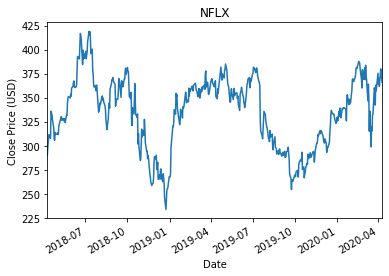

In [30]:
ax = nflx_history_last_two_years["Close"].plot()

ax.set_title("NFLX")
ax.set_ylabel("Close Price (USD)")

Text(0, 0.5, 'Close Price (USD)')

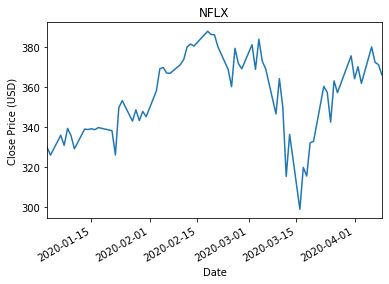

In [31]:
ax = nflx_history_last_two_years.loc["2020-01-01":, "Close"].plot()

ax.set_title("NFLX")
ax.set_ylabel("Close Price (USD)")

### 1.2.3. mass download of market data: `yf.download()` function <a name="get-market-and-meta-data:-yf.download()-function"></a>

In [32]:
securityTickerToNameDict = {
    'AAPL':     "Apple Inc. Stock",
    'GOOG':     "Alphabet Inc. Stock",
    'FB':       "Facebook, Inc. Stock",
    'MSFT':     "Microsoft Corporation Stock",
    'INTC':     "Intel Corporation Stock",
    'AMZN':     "Amazon.com, Inc. Stock",
    'BABA':     "Alibaba Group Holding Limited Stock",
    'NFLX':     "Netflix, Inc. Stock",
    'DIS':      "The Walt Disney Company Stock",
    'GS':       "The Goldman Sachs Group, Inc. Stock",
    'DB':       "Deutsche Bank Aktiengesellschaft Stock",
    '^GSPC':    "S&P 500 Index",
    '^VIX':     "CBOE Volatility Index",
    'EURUSD=X': "EUR/USD Exchange Rate",
    'EURCHF=X': "EUR/CHF Exchange Rate",
    'EURGBP=X': "EUR/GBP Exchange Rate",
    'FCAU':     "Fiat Chrysler Automobiles N.V.",
    'E':        "Eni S.p.A. Stock",
    'ENIA':     "Enel Americas S.A. Stock"
}

In [33]:
tickerList = list(securityTickerToNameDict.keys())
tickerList

['AAPL',
 'GOOG',
 'FB',
 'MSFT',
 'INTC',
 'AMZN',
 'BABA',
 'NFLX',
 'DIS',
 'GS',
 'DB',
 '^GSPC',
 '^VIX',
 'EURUSD=X',
 'EURCHF=X',
 'EURGBP=X',
 'FCAU',
 'E',
 'ENIA']

In [34]:
tickerListString = ' '.join(tickerList)
tickerListString

'AAPL GOOG FB MSFT INTC AMZN BABA NFLX DIS GS DB ^GSPC ^VIX EURUSD=X EURCHF=X EURGBP=X FCAU E ENIA'

````python
yf.download(tickers, start[, end, interval])
```

where:
    
- `tickers` parameter is the list of Yahoo! Finance tickers for which we query data;
- `start` parameter, is the `"YYYY-MM-DD"` Python String representing the first date for which we query data;
- `end` parameter, optional, is the `"YYYY-MM-DD"` Python String representing the last date for which we query data. By default is the last available date, which is usually either today or the last business day;
- `interval` parameter, optional, is the Python String representing the frequency of data retrieval. By default it is `"1d"`, that is daily frequency. Accepted values are the same as in case of `.history(..., interval, ...)`.

Alternatively

````python
yf.download(tickers, period[, interval])
```

where `period` parameter, optional, the length of the most recent period for which we query data. By default it is "ytd" (acronym for year to date), that is the period of time beginning the first day of the current year up to the current date. Accepted values are the same as in case of `.history(..., period, ...)`.

In [35]:
if downloadData:
    %time dataFull = yf.download(tickers=tickerListString, start="1985-01-01")
    data

In [36]:
if downloadData:
    dataFull["Adj Close"].loc["2020-04-08", "AAPL"]

In [37]:
filePath = os.path.join(dataFolderPath, "Securities_Close_Price_Dataset.csv")

In [38]:
if downloadData:
    data = dataFull["Close"]
    
else:
    %time data = pd.read_csv(filepath_or_buffer = filePath, index_col = 0, parse_dates = True)
    
data

Wall time: 51.9 ms


,AAPL,AMZN,BABA,DB,DIS,E,ENIA,EURCHF=X,EURGBP=X,EURUSD=X,FB,FCAU,GOOG,GS,INTC,MSFT,NFLX,^GSPC,^VIX
Date,,,,,,,,,,,,,,,,,,,
1984-12-31,0.520089,NaN,NaN,NaN,1.230556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583333,NaN,NaN,167.240005,NaN
1985-01-02,0.497768,NaN,NaN,NaN,1.235694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.572917,NaN,NaN,165.369995,NaN
1985-01-03,0.506696,NaN,NaN,NaN,1.225418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583333,NaN,NaN,164.570007,NaN
1985-01-04,0.506696,NaN,NaN,NaN,1.220280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.593750,NaN,NaN,163.679993,NaN
1985-01-07,0.504464,NaN,NaN,NaN,1.235694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.609375,NaN,NaN,164.240005,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-02,244.929993,1918.829956,188.899994,6.02,96.970001,21.570000,5.79,1.05821,0.88450,1.095362,158.190002,6.81,1120.839966,149.929993,54.349998,155.259995,370.079987,2526.899902,50.910000
2020-04-03,241.410004,1906.589966,187.110001,5.90,93.879997,20.219999,6.82,1.05675,0.87503,1.084740,154.179993,6.71,1097.880005,146.929993,54.130001,153.830002,361.760010,2488.649902,46.799999
2020-04-06,262.470001,1997.589966,196.449997,6.38,99.580002,20.969999,7.11,1.05594,0.88427,1.080696,165.550003,7.25,1186.920044,158.229996,58.430000,165.270004,379.959991,2663.679932,45.240002


In [39]:
if downloadData:
    %time data.to_csv(path_or_buf = filePath)

In [40]:
# removeFile(filePath)

## 1.3. Data Exploration <a name="data-exploration"></a>

In [41]:
data.head()

,AAPL,AMZN,BABA,DB,DIS,E,ENIA,EURCHF=X,EURGBP=X,EURUSD=X,FB,FCAU,GOOG,GS,INTC,MSFT,NFLX,^GSPC,^VIX
Date,,,,,,,,,,,,,,,,,,,
1984-12-31,0.520089,NaN,NaN,NaN,1.230556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583333,NaN,NaN,167.240005,NaN
1985-01-02,0.497768,NaN,NaN,NaN,1.235694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.572917,NaN,NaN,165.369995,NaN
1985-01-03,0.506696,NaN,NaN,NaN,1.225418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583333,NaN,NaN,164.570007,NaN
1985-01-04,0.506696,NaN,NaN,NaN,1.220280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.593750,NaN,NaN,163.679993,NaN
1985-01-07,0.504464,NaN,NaN,NaN,1.235694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.609375,NaN,NaN,164.240005,NaN


In [42]:
data.tail()

,AAPL,AMZN,BABA,DB,DIS,E,ENIA,EURCHF=X,EURGBP=X,EURUSD=X,FB,FCAU,GOOG,GS,INTC,MSFT,NFLX,^GSPC,^VIX
Date,,,,,,,,,,,,,,,,,,,
2020-04-02,244.929993,1918.829956,188.899994,6.02,96.970001,21.570000,5.79,1.05821,0.88450,1.095362,158.190002,6.81,1120.839966,149.929993,54.349998,155.259995,370.079987,2526.899902,50.910000
2020-04-03,241.410004,1906.589966,187.110001,5.90,93.879997,20.219999,6.82,1.05675,0.87503,1.084740,154.179993,6.71,1097.880005,146.929993,54.130001,153.830002,361.760010,2488.649902,46.799999
2020-04-06,262.470001,1997.589966,196.449997,6.38,99.580002,20.969999,7.11,1.05594,0.88427,1.080696,165.550003,7.25,1186.920044,158.229996,58.430000,165.270004,379.959991,2663.679932,45.240002
2020-04-07,259.429993,2011.599976,198.000000,6.64,101.239998,20.209999,7.29,1.05629,0.88236,1.080380,168.830002,7.62,1186.510010,166.020004,58.400002,163.490005,372.279999,2659.409912,46.700001
2020-04-08,266.070007,2043.000000,195.979996,6.54,101.070000,20.309999,7.92,1.05499,0.87680,1.085541,174.279999,7.86,1210.280029,176.960007,58.980000,165.130005,371.119995,2749.979980,43.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A035ECD688>,
      dtype=object)

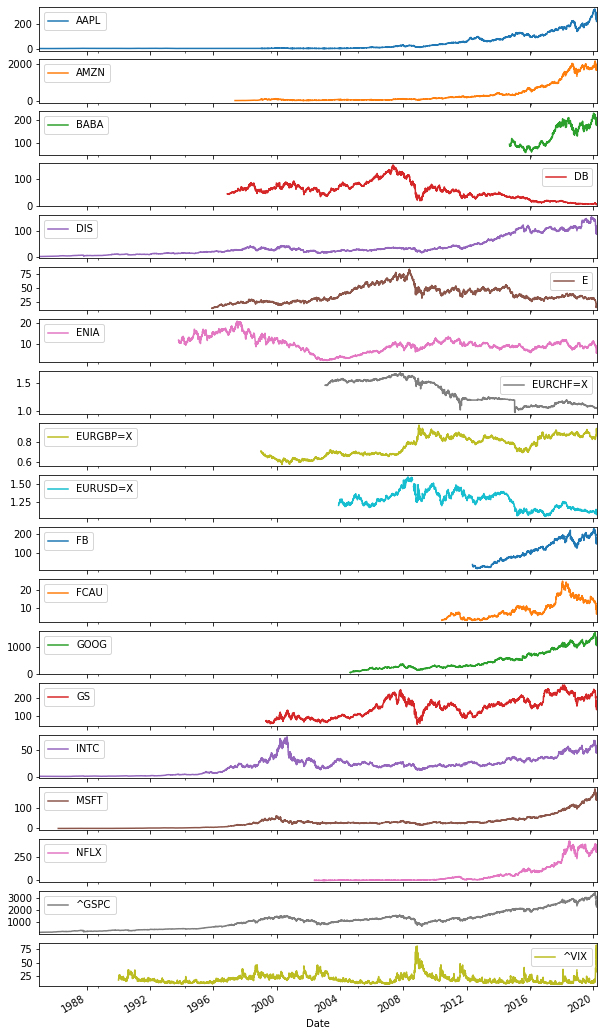

In [43]:
data.plot(figsize=(10,20), subplots=True)

### 1.3.1. Summary Statistics <a name="summary-statistics"></a>

In [44]:
data.shape

(9088, 19)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9088 entries, 1984-12-31 to 2020-04-08
Data columns (total 19 columns):
AAPL        8891 non-null float64
AMZN        5763 non-null float64
BABA        1398 non-null float64
DB          5886 non-null float64
DIS         8891 non-null float64
E           6133 non-null float64
ENIA        6665 non-null float64
EURCHF=X    4442 non-null float64
EURGBP=X    5519 non-null float64
EURUSD=X    4239 non-null float64
FB          1985 non-null float64
FCAU        2476 non-null float64
GOOG        3937 non-null float64
GS          5268 non-null float64
INTC        8891 non-null float64
MSFT        8589 non-null float64
NFLX        4501 non-null float64
^GSPC       8891 non-null float64
^VIX        7627 non-null float64
dtypes: float64(19)
memory usage: 1.4 MB


In [46]:
data.describe().round(1)

,AAPL,AMZN,BABA,DB,DIS,E,ENIA,EURCHF=X,EURGBP=X,EURUSD=X,FB,FCAU,GOOG,GS,INTC,MSFT,NFLX,^GSPC,^VIX
count,8891.0,5763.0,1398.0,5886.0,8891.0,6133.0,6665.0,4442.0,5519.0,4239.0,1985.0,2476.0,3937.0,5268.0,8891.0,8589.0,4501.0,8891.0,7627.0
mean,36.4,341.8,133.9,55.7,37.7,38.1,9.5,1.3,0.8,1.3,112.4,9.1,504.4,147.3,20.1,29.2,71.4,1137.0,19.3
std,60.9,525.1,47.3,31.2,35.2,14.1,3.6,0.2,0.1,0.1,58.1,5.2,354.1,53.0,15.8,30.8,108.3,732.4,8.1
min,0.3,1.4,57.4,5.5,1.2,12.4,2.0,1.0,0.6,1.0,17.7,2.8,49.8,52.0,0.3,0.1,0.4,163.7,9.1
25%,1.3,37.6,86.2,33.1,13.8,26.8,7.7,1.1,0.7,1.2,64.9,5.0,237.6,97.5,3.7,3.5,3.7,451.9,13.6
50%,2.1,81.7,138.3,55.1,26.3,35.0,9.4,1.2,0.8,1.3,114.1,7.3,328.3,151.0,20.8,26.2,14.3,1116.3,17.2
75%,50.3,335.2,177.6,74.1,39.9,47.3,11.4,1.5,0.9,1.3,168.1,12.6,739.3,187.7,29.1,34.6,94.9,1428.9,22.6
max,327.2,2170.2,230.5,152.3,151.6,84.1,20.8,1.7,1.0,1.6,223.2,24.8,1526.7,273.4,74.9,188.7,419.0,3386.1,82.7


In [47]:
data.mean()

AAPL          36.440622
AMZN         341.836203
BABA         133.870594
DB            55.650240
DIS           37.662621
E             38.129843
ENIA           9.548923
EURCHF=X       1.331863
EURGBP=X       0.762793
EURUSD=X       1.264390
FB           112.442922
FCAU           9.119736
GOOG         504.361554
GS           147.286106
INTC          20.149432
MSFT          29.238418
NFLX          71.443759
^GSPC       1136.968498
^VIX          19.267536
dtype: float64

In [48]:
data.std()

AAPL         60.867452
AMZN        525.127281
BABA         47.259318
DB           31.151545
DIS          35.151367
E            14.142997
ENIA          3.644822
EURCHF=X      0.203882
EURGBP=X      0.099321
EURUSD=X      0.121269
FB           58.119896
FCAU          5.212251
GOOG        354.141528
GS           52.958485
INTC         15.786005
MSFT         30.849411
NFLX        108.340010
^GSPC       732.389512
^VIX          8.058568
dtype: float64

### 1.3.2. Returns <a name="returns"></a>

\begin{equation}
\begin{aligned}
R^{log}_{t,1} = \log \left( \frac{P_t}{P_{t-1}} \right)
\end{aligned}
\end{equation}


In [49]:
rets = np.log(data/data.shift(periods=1))

In [50]:
rets.tail().round(2)

,AAPL,AMZN,BABA,DB,DIS,E,ENIA,EURCHF=X,EURGBP=X,EURUSD=X,FB,FCAU,GOOG,GS,INTC,MSFT,NFLX,^GSPC,^VIX
Date,,,,,,,,,,,,,,,,,,,
2020-04-02,0.02,0.01,0.01,0.01,0.02,0.08,0.01,-0.0,-0.00,-0.01,-0.01,-0.00,0.01,0.03,0.05,0.02,0.02,0.02,-0.11
2020-04-03,-0.01,-0.01,-0.01,-0.02,-0.03,-0.06,0.16,-0.0,-0.01,-0.01,-0.03,-0.01,-0.02,-0.02,-0.00,-0.01,-0.02,-0.02,-0.08
2020-04-06,0.08,0.05,0.05,0.08,0.06,0.04,0.04,-0.0,0.01,-0.00,0.07,0.08,0.08,0.07,0.08,0.07,0.05,0.07,-0.03
2020-04-07,-0.01,0.01,0.01,0.04,0.02,-0.04,0.03,0.0,-0.00,-0.00,0.02,0.05,-0.00,0.05,-0.00,-0.01,-0.02,-0.00,0.03
2020-04-08,0.03,0.02,-0.01,-0.02,-0.00,0.00,0.08,-0.0,-0.01,0.00,0.03,0.03,0.02,0.06,0.01,0.01,-0.00,0.03,-0.08


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A03654CD08>,
      dtype=object)

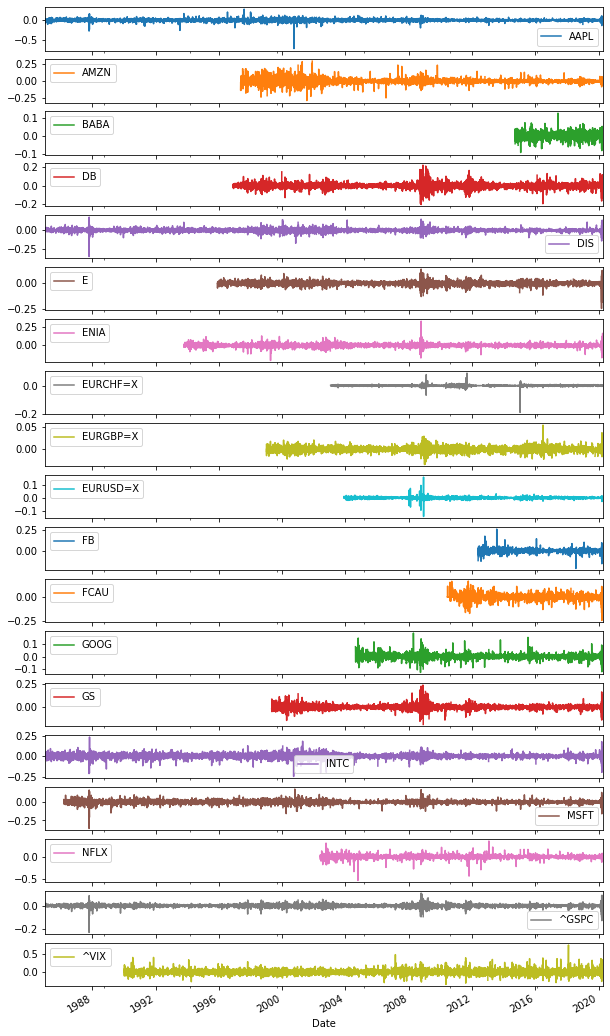

In [51]:
rets.plot(figsize=(10,20), subplots=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A036CDADC8>,
      dtype=object)

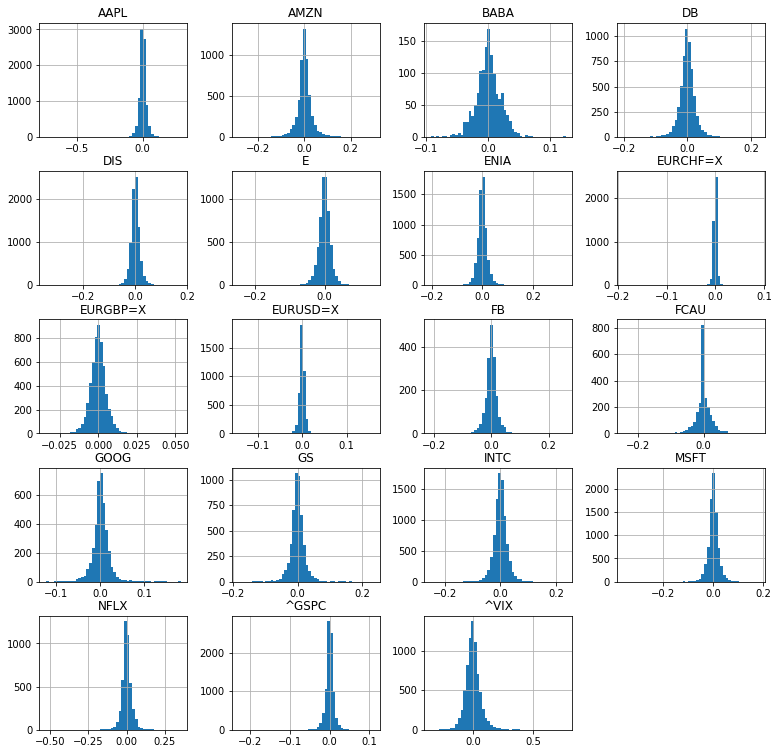

In [52]:
rets.hist(figsize=(13,13), bins=50)

### 1.3.3. Resampling <a name="resampling"></a>

````python
.resample(rule, label, closed).computation()
```

creates a resampled DataFrame binning the original one into row buckets according to the resampling `rule`. Row buckets are assigned to the index of the left or right edge according to the `label` parameter and buckets either include the left or right edge according to the `closed` parameter. For details see [.resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html). Parameters are: 
    
- `rule` parameter is the Python String representing the target resampling conversion. Values are of the form `"NumberFrequencyString"` (e.g. `"1w"` for weekly resampling) and a non exhaustive list of accepted frequency `FrequencyString` strings is 
    
`FrequencyString` parameter | data frequency
:---: | :---
B   | business day frequency
D   | calendar day frequency
W   | weekly frequency
M   | month end frequency
BM  | business month end frequency
MS  | month start frequency
BMS | business month start frequency
Q   | quarter end frequency
BQ  | business quarter endfrequency
QS  | quarter start frequency
BQS | business quarter start frequency
A   | year end frequency
BA  | business year end frequency
AS  | year start frequency
BAS | business year start frequency
H   | hourly frequency
T   | minutely frequency
S   | secondly frequency
L   | milliseconds
U   | microseconds

- `label` parameter, either `"left"` or `"right"`, sets the bin edge label to use to label the bucket with;


- `closed` parameter, either `"left"` or `"right"`, sets which side of bin interval is closed;


- `.computation()` is a method which maps the values of the rows in each bucket to a single value. Most common methods are in the following table (see ["Computations / descriptive stats" documentation](https://pandas.pydata.org/pandas-docs/stable/reference/resampling.html#computations-descriptive-stats) for details)
    
`.computation()` method | returns
:---: | :---
`.last()`   | value of the last row in each bucket
`.first()`   | value of the first row in each bucket
`.min()`   | minimum value of the rows in each bucket
`.max()`   | maximum value of the rows in each bucket
`.sum()`   | sum of the values of the rows in each bucket
`.mean()`   | mean of the values of the rows in each bucket

#### 1.3.3.1. Resampling Prices <a name="resampling-prices"></a>

In [53]:
data.head(15)

,AAPL,AMZN,BABA,DB,DIS,E,ENIA,EURCHF=X,EURGBP=X,EURUSD=X,FB,FCAU,GOOG,GS,INTC,MSFT,NFLX,^GSPC,^VIX
Date,,,,,,,,,,,,,,,,,,,
1984-12-31,0.520089,NaN,NaN,NaN,1.230556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583333,NaN,NaN,167.240005,NaN
1985-01-02,0.497768,NaN,NaN,NaN,1.235694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.572917,NaN,NaN,165.369995,NaN
1985-01-03,0.506696,NaN,NaN,NaN,1.225418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583333,NaN,NaN,164.570007,NaN
1985-01-04,0.506696,NaN,NaN,NaN,1.220280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.593750,NaN,NaN,163.679993,NaN
1985-01-07,0.504464,NaN,NaN,NaN,1.235694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.609375,NaN,NaN,164.240005,NaN
1985-01-08,0.500000,NaN,NaN,NaN,1.243401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.588542,NaN,NaN,163.990005,NaN
1985-01-09,0.513393,NaN,NaN,NaN,1.263953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.598958,NaN,NaN,165.179993,NaN
1985-01-10,0.535714,NaN,NaN,NaN,1.294781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625000,NaN,NaN,168.309998,NaN
1985-01-11,0.531250,NaN,NaN,NaN,1.299919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.635417,NaN,NaN,167.910004,NaN


In [54]:
weeklyData = data.resample(rule='5B', label='right', closed='right').last()

In [55]:
weeklyData.head()

,AAPL,AMZN,BABA,DB,DIS,E,ENIA,EURCHF=X,EURGBP=X,EURUSD=X,FB,FCAU,GOOG,GS,INTC,MSFT,NFLX,^GSPC,^VIX
Date,,,,,,,,,,,,,,,,,,,
1984-12-31,0.520089,NaN,NaN,NaN,1.230556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583333,NaN,NaN,167.240005,NaN
1985-01-07,0.504464,NaN,NaN,NaN,1.235694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.609375,NaN,NaN,164.240005,NaN
1985-01-14,0.546875,NaN,NaN,NaN,1.335885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.645833,NaN,NaN,170.509995,NaN
1985-01-21,0.522321,NaN,NaN,NaN,1.400111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.661458,NaN,NaN,175.229996,NaN
1985-01-28,0.540179,NaN,NaN,NaN,1.430939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.640625,NaN,NaN,177.399994,NaN


In [56]:
weeklyData.loc["1985-01-07", "AAPL"]

0.5044642686843872

In [57]:
data.loc[:"1985-01-07", "AAPL"]

Date
1984-12-31    0.520089
1985-01-02    0.497768
1985-01-03    0.506696
1985-01-04    0.506696
1985-01-07    0.504464
Name: AAPL, dtype: float64

In [58]:
weeklyData.loc["1985-01-14", "AAPL"]

0.546875

In [59]:
data.loc["1985-01-08":"1985-01-14", "AAPL"]

Date
1985-01-08    0.500000
1985-01-09    0.513393
1985-01-10    0.535714
1985-01-11    0.531250
1985-01-14    0.546875
Name: AAPL, dtype: float64

In [60]:
weeklyData.loc["1985-01-21", "AAPL"]

0.5223214030265808

In [61]:
data.loc["1985-01-15":"1985-01-21", "AAPL"]

Date
1985-01-15    0.535714
1985-01-16    0.540179
1985-01-17    0.502232
1985-01-18    0.511161
1985-01-21    0.522321
Name: AAPL, dtype: float64

#### 1.3.3.2. Resampling log-Returns <a name="resampling-log-returns"></a>

log-returns are time-additive

\begin{equation}
\begin{aligned}
R^{log}_{t,1} = \log \left( \frac{P_t}{P_{t-1}} \right)
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
R^{log}_{t,n} = \log \left( \frac{P_t}{P_{t-n}} \right)
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
R^{log}_{t,n} &= \log \left( \frac{P_t}{P_{t-n}} \right) \nonumber \\
              &= \log \left( \frac{P_t}{P_{t-1}} \times \frac{P_{t-1}}{P_{t-2}} \times \frac{P_{t-2}}{P_{t-3}} \times \cdots \times \frac{P_{t-n+2}}{P_{t-n+1}} \times \frac{P_{t-n+1}}{P_{t-n}} \right) \nonumber \\
              &= \log \left( \frac{P_t}{P_{t-1}} \right) + \log \left( \frac{P_{t-1}}{P_{t-2}} \right) + \log \left( \frac{P_{t-2}}{P_{t-3}} \right) + \cdots + \log \left( \frac{P_{t-n+2}}{P_{t-n+1}} \right) + \log \left( \frac{P_{t-n+1}}{P_{t-n}} \right) \nonumber \\
              &= R^{log}_{t,1} + R^{log}_{t-1,1} + R^{log}_{t-2,1} + \cdots + R^{log}_{t-n+2,1} + R^{log}_{t-n+1,1} \nonumber \\
              &= \sum_{i=1}^{n} R^{log}_{t-i+1,1} \nonumber \\
\end{aligned}
\end{equation}

that is the n-period log-return at time t is the sum of the n most recent one-period log-returns up to time t.

In [62]:
rets.head(15)

,AAPL,AMZN,BABA,DB,DIS,E,ENIA,EURCHF=X,EURGBP=X,EURUSD=X,FB,FCAU,GOOG,GS,INTC,MSFT,NFLX,^GSPC,^VIX
Date,,,,,,,,,,,,,,,,,,,
1984-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-01-02,-0.043867,NaN,NaN,NaN,0.004167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018018,NaN,NaN,-0.011245,NaN
1985-01-03,0.017778,NaN,NaN,NaN,-0.008351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018018,NaN,NaN,-0.004849,NaN
1985-01-04,0.000000,NaN,NaN,NaN,-0.004202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017700,NaN,NaN,-0.005423,NaN
1985-01-07,-0.004415,NaN,NaN,NaN,0.012553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025975,NaN,NaN,0.003416,NaN
1985-01-08,-0.008889,NaN,NaN,NaN,0.006218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.034786,NaN,NaN,-0.001523,NaN
1985-01-09,0.026433,NaN,NaN,NaN,0.016394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017544,NaN,NaN,0.007230,NaN
1985-01-10,0.042560,NaN,NaN,NaN,0.024098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042560,NaN,NaN,0.018772,NaN
1985-01-11,-0.008368,NaN,NaN,NaN,0.003960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016529,NaN,NaN,-0.002379,NaN


In [63]:
weeklyRets = rets.resample(rule='5B', label='right', closed='right').sum()

In [64]:
weeklyRets.head()

,AAPL,AMZN,BABA,DB,DIS,E,ENIA,EURCHF=X,EURGBP=X,EURUSD=X,FB,FCAU,GOOG,GS,INTC,MSFT,NFLX,^GSPC,^VIX
Date,,,,,,,,,,,,,,,,,,,
1984-12-31,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1985-01-07,-0.030503,0.0,0.0,0.0,0.004167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043675,0.0,0.0,-0.018101,0.0
1985-01-14,0.080723,0.0,0.0,0.0,0.077962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058108,0.0,0.0,0.037465,0.0
1985-01-21,-0.045937,0.0,0.0,0.0,0.046957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023906,0.0,0.0,0.027305,0.0
1985-01-28,0.033617,0.0,0.0,0.0,0.021779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.032003,0.0,0.0,0.012308,0.0


In [65]:
weeklyRets.loc["1985-01-07", "AAPL"]

-0.03050345530761514

In [66]:
rets.loc[:"1985-01-07", "AAPL"]

Date
1984-12-31         NaN
1985-01-02   -0.043867
1985-01-03    0.017778
1985-01-04    0.000000
1985-01-07   -0.004415
Name: AAPL, dtype: float64

In [67]:
rets.loc[:"1985-01-07", "AAPL"].sum()

-0.03050345530761514

In [68]:
weeklyRets.loc["1985-01-14", "AAPL"]

0.0807232450308244

In [69]:
rets.loc["1985-01-08":"1985-01-14", "AAPL"]

Date
1985-01-08   -0.008889
1985-01-09    0.026433
1985-01-10    0.042560
1985-01-11   -0.008368
1985-01-14    0.028988
Name: AAPL, dtype: float64

In [70]:
rets.loc["1985-01-08":"1985-01-14", "AAPL"].sum()

0.0807232450308244

In [71]:
weeklyRets.loc["1985-01-21", "AAPL"]

-0.045937144093401994

In [72]:
rets.loc["1985-01-15":"1985-01-21", "AAPL"]

Date
1985-01-15   -0.020619
1985-01-16    0.008299
1985-01-17   -0.072837
1985-01-18    0.017622
1985-01-21    0.021599
Name: AAPL, dtype: float64

In [73]:
rets.loc["1985-01-15":"1985-01-21", "AAPL"].sum()

-0.045937144093401994

### 1.3.4. Rolling Statistics <a name="rolling-statistics"></a>

- mean e std e 1-variate stuff

#### 1.3.4.1 Rolling Correlation Matrix <a name="rolling-correlation-matrix"></a>

### 1.3.5. _Focus on:_ Covid-19 crisis <a name="focus-on:-covid-19-crisis"></a>

## 1.3. S&P500 - VIX correlation analysis <a name="s&p500-vix-correlation-analysis"></a>